In [1]:
# CAP 6619 2020 Fall, X. Zhu, Sept 20 2020
# Single Perceptron Learning and Decision Boundary Visualizaiton
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
class1 = pd.read_csv("Class1Linear.txt")
class2 = pd.read_csv("Class2Linear.txt")
print(class1.shape)
print(class2.shape)
class1.head()

(70, 2)
(70, 2)


,weight,height
0,0.407,0.347
1,0.644,0.415
2,0.110,0.010
3,0.907,0.859
4,0.836,0.211


In [2]:
# add lables to the data. .insert() will directly modify the dataframe
class1.insert(class1.shape[1],'label',1)
class1.head()

,weight,height,label
0,0.407,0.347,1
1,0.644,0.415,1
2,0.110,0.010,1
3,0.907,0.859,1
4,0.836,0.211,1


In [3]:
# add lables to the data. .insert() will directly modify the dataframe
class2.insert(class2.shape[1],'label',0)
class2.head()

,weight,height,label
0,0.132,0.757,0
1,0.722,0.888,0
2,0.095,0.804,0
3,0.472,0.701,0
4,0.179,0.874,0


In [4]:
class12 = class1.append(class2)
print(class12.shape)
class12.head()

(140, 3)


,weight,height,label
0,0.407,0.347,1
1,0.644,0.415,1
2,0.110,0.010,1
3,0.907,0.859,1
4,0.836,0.211,1


Text(0, 0.5, 'X2')

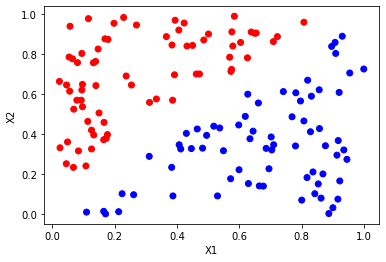

In [7]:
colors=["red","blue"]
plt.scatter(class12.iloc[:,0],class12.iloc[:,1],color=[colors[idx] for idx in class12.iloc[:,2]],marker="o")
plt.xlabel("X1")
plt.ylabel("X2")
# The dataset is clearly not a linearly searable problem.

In [8]:
# partitioning the dataset into training vs. test sets
features,labels=class12.iloc[:,0:-1],class12.loc[:,['label']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels,test_size=.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 2)
(28, 2)
(112, 1)
(28, 1)


In [9]:
# covert data from dataframe into matrix format for arithemetic calculation
X_train_m=np.asmatrix(X_train, dtype = 'float64')
X_test_m=np.asmatrix(X_test, dtype = 'float64')
y_train_m=np.asmatrix(y_train, dtype = 'float64')
y_test_m=np.asmatrix(y_test, dtype = 'float64')
X_train_m

matrix([[0.704, 0.321],
        [0.171, 0.001],
        [0.741, 0.613],
        [0.569, 0.785],
        [0.462, 0.701],
        [0.432, 0.841],
        [0.917, 0.368],
        [0.518, 0.44 ],
        [0.237, 0.691],
        [0.095, 0.621],
        [0.935, 0.321],
        [0.407, 0.347],
        [0.909, 0.804],
        [0.916, 0.075],
        [0.482, 0.33 ],
        [0.661, 0.556],
        [0.069, 0.525],
        [0.097, 0.649],
        [0.229, 0.984],
        [0.945, 0.274],
        [0.627, 0.6  ],
        [0.896, 0.839],
        [0.049, 0.361],
        [0.817, 0.183],
        [0.819, 0.67 ],
        [0.198, 0.955],
        [0.116, 0.978],
        [0.084, 0.316],
        [0.842, 0.102],
        [0.677, 0.14 ],
        [0.584, 0.99 ],
        [0.472, 0.701],
        [0.629, 0.153],
        [0.446, 0.328],
        [0.054, 0.786],
        [0.71 , 0.347],
        [0.114, 0.464],
        [0.495, 0.394],
        [0.781, 0.607],
        [0.579, 0.841],
        [0.664, 0.141],
        [0.954, 

In [11]:
def perceptron(features, labels, learning_rate, threshold):
    # random initialize weight values between rage: [-0.5,0.5]
    w = np.random.rand(features.shape[1]+1)-0.5
    misclassified_ = []
    misclassified=1
    while misclassified !=0:
        misclassified = 0
        for i, x in enumerate(features):
            x = np.insert(x,0,1)
            v = np.dot(w, x.transpose())
            actual = 1.0 if (v >= threshold) else 0
            delta = (labels[i] - actual)
            if(delta): # misclassified
                misclassified += 1
                w =w+ (delta*x*learning_rate)
        misclassified_.append(misclassified)
    return (w, misclassified_)

In [12]:
eta, threshold=0.01, 0.5
w, misclassified=perceptron(X_train_m,y_train_m, eta,threshold)
print(w,misclassified)

[[ 0.47520038  0.28994573 -0.22198145]] [32, 30, 24, 17, 15, 11, 11, 6, 4, 3, 1, 0]


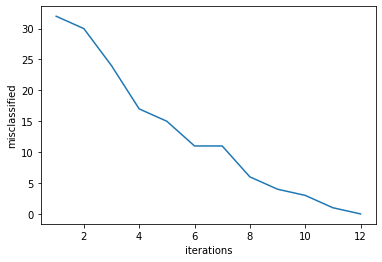

In [14]:
epochs = np.arange(1, len(misclassified)+1)
plt.plot(epochs, misclassified)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()

In [15]:
# Now we create a plot to show learned decision boundaries (find slope and intercept)
print(w)
slope=w[0,1]/w[0,2]*(-1)
intercept=w[0,0]/w[0,2]*(-1)+threshold/w[0,2]
print(slope,intercept)

[[ 0.47520038  0.28994573 -0.22198145]]
1.3061709689554981 -0.1117193146594877


Text(0, 0.5, 'X2')

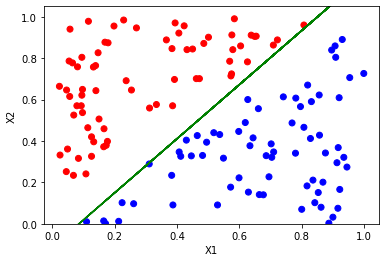

In [17]:
xvalues=class12.iloc[:,0]
yvalues=xvalues*slope+intercept
#plt.scatter(class12.iloc[:,0],class12.iloc[:,1],color=[colors[idx] for idx in class12.iloc[:,2]])
plt.scatter(class12.iloc[:,0],class12.iloc[:,1],color=[colors[idx] for idx in class12.iloc[:,2]],marker="o")
plt.plot(xvalues,yvalues,"g-")
plt.ylim(0,1.05)
plt.xlabel("X1")
plt.ylabel("X2")